In [ ]:
#### Load the input data ####
'''
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275)
  
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 
  
# metadata 
#print(bike_sharing.metadata) 
  
# variable information 
#print(bike_sharing.variables) 
'''

import pandas as pd
df=pd.read_csv(r"C:\Users\srava\sriharsha_code\End to End Project\bike_sharing_project\notebook\data\bike_sharing_data.csv")


# Dataset Information

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


## Variables Table


|Variable Name|	Role|	Type|	Description|	Units|	Missing Values|
|-----|:-----|:---:|:-----:|:---:|:-----:|
|instant|	ID|	Integer|	record index|	|	no|
|dteday|	Feature|	Date|	date||		no|
|season|	Feature|	Categorical|	1:winter, 2:spring, 3:summer, 4:fall||		no|
|yr|	Feature|	Categorical|	year (0: 2011, 1: 2012)||		no|
|mnth|	Feature|	Categorical|	month (1 to 12)||		no|
|hr|	Feature|	Categorical|	hour (0 to 23)||		no|
|holiday|	Feature|	Binary|	weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)||		no|
|weekday|	Feature|	Categorical|	day of the week||		no|
|workingday|	Feature|	Binary|	if day is neither weekend nor holiday is 1, otherwise is 0||		no|
|weathersit|	Feature|	Categorical|	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy||		no|
|temp|	Feature|	Continuous|	Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)	C||	no|
|atemp|	Feature|	Continuous|	Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)	C||	no|
|hum|	Feature|	Continuous|	Normalized humidity. The values are divided to 100 (max)||		no|
|windspeed|	Feature|	Continuous|	Normalized wind speed. The values are divided to 67 (max)||		no|
|casual|	Other|	Integer|	count of casual users||		no|
|registered|	Other|	Integer|	count of registered users||		no|
|cnt|	Target|	Integer| count of total rental bikes including both casual and registered||		no|


In [28]:
#### Import the Required Libraries ####

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [29]:
#### Combining X, y for input dataframe ####

#df = pd.concat([X,y],axis=1)
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [30]:
#df.to_csv(r"C:\Users\srava\sriharsha_code\End to End Project\bike_sharing_project\notebook\data\bike_sharing_data.csv", index=False)

df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

##### Observations:

    * There are no missing values inside the dataset

In [31]:
df.duplicated().sum()

0

In [32]:
#### Drop dteday column since this info is being captured in other individual columns ####

df.drop('dteday', axis=1, inplace=True)
df.head(2)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40


In [33]:
#### descriptive statistics ####

df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


##### Observations:

    * season: It had 4 unique values.
    * yr: 2 years of historical.
    * mnth: Exactly 12 months.
    * hr: complete 24 hors per day.
    * holiday: boolean with 1 and 0 check.
    * weekday: Exactly 7 where it starts from 0 -sunday.
    * weathersit: 4 as per data dictionary.
    * temp: The warmer the temperature, the closer the score is to 1.
            [ very cold (–8°C)=0, very hot (+39°C)=1 ]
            [ example if temp 20°C: 20−(−8)/39-8 = 28/47 ≈0.595]

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [35]:
df.nunique()

season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           50
atemp          65
hum            89
windspeed      30
cnt           869
dtype: int64

In [36]:
#### Categorical column values labeling for easy Identification ####

df['weathersit'] = df['weathersit'].map({1:'Clear to Partly Cloudy', 2:'Misty and Cloudy', 3:'Light Rain or Snow', 4:'Heavy Rain or Snow'})

df['season'] = df['season'].map({1:'winter', 2:'spring', 3:'summer', 4:'fall'})

df['mnth'] = df['mnth'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr',5:'May', 6:'Jun', 7:'Jul', 8:'Aug',
                                9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

df['weekday'] = df['weekday'].map({0:'Sun', 1:'Mon', 2:'Tues', 3:'Wed', 4:'Thurs',5:'Fri', 6:'Sat'})

df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,winter,0,Jan,0,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.81,0.0,16
1,winter,0,Jan,1,0,Sat,0,Clear to Partly Cloudy,0.22,0.2727,0.80,0.0,40
2,winter,0,Jan,2,0,Sat,0,Clear to Partly Cloudy,0.22,0.2727,0.80,0.0,32
3,winter,0,Jan,3,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.75,0.0,13
4,winter,0,Jan,4,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.75,0.0,1


### Univariate Analysis

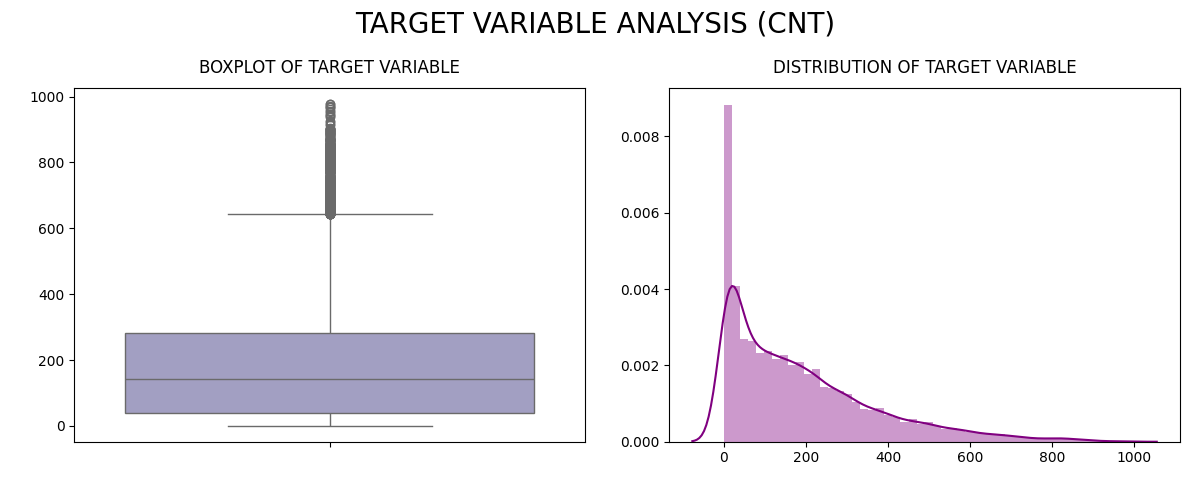

In [37]:
#### Create the plot grid ####

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

#title
fig.suptitle('Target Variable Analysis (cnt)'.upper(),fontsize=20)

#plot1
sns.boxplot(y=df['cnt'], ax=ax[0], palette='Purples')
ax[0].set_title('boxplot of target variable'.upper(), fontsize=12, fontweight=20, y=1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

#plot2
sns.distplot(df['cnt'], ax=ax[1], color='purple')
ax[1].set_title('distribution of target variable'.upper(), fontsize=12, fontweight=20, y=1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()

#### Observation:
    
   * CNT is not normally distributed. It is positively skewed with a heavy right tail.
   * The median looks somewhere around ~150–180. Points beyond ~600 are plotted individually as outliers indicating occasional.
   * Significant number of high-value outliers exist. They are real patterns (not noise), possibly representing peak demand periods.
   * Most of the data lies in the lower range, meaning activity/event counts are usually low.


### Continuous Variables

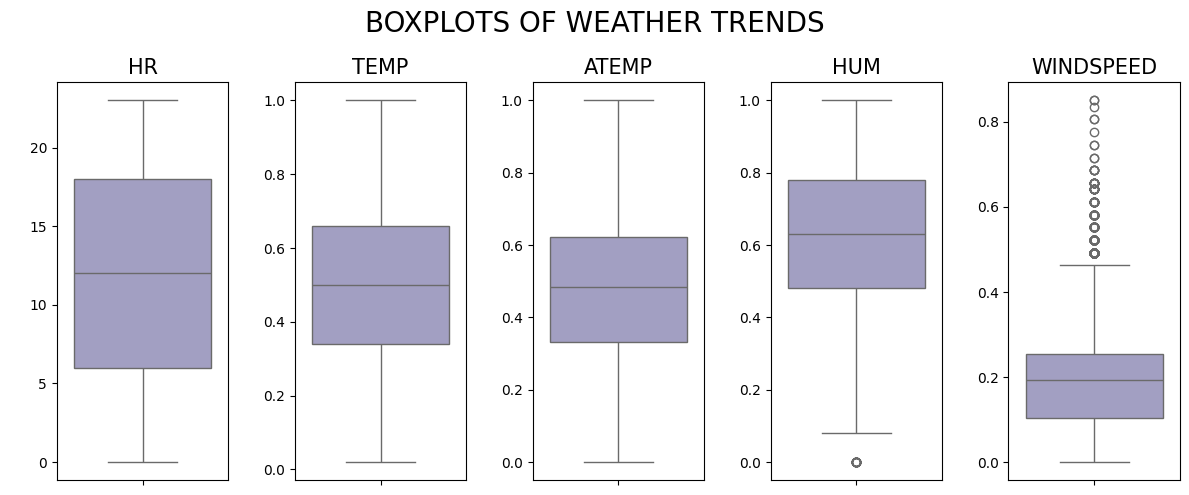

In [38]:
cont_var = [i for i in df.select_dtypes(exclude=object).columns if df[i].nunique() > 2 and i != 'cnt']
cont_var

#### Create the plot grid ####

fig, ax = plt.subplots(nrows=1, ncols=len(cont_var), figsize=(12,5))

#title
fig.suptitle('boxplots of weather trends'.upper(),fontsize=20)

#looping
for i in range(len(cont_var)):
    sns.boxplot(y=df[cont_var[i]], ax=ax[i], palette='Purples')
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize=15)
    ax[i].set_ylabel(' ')
    
plt.tight_layout()
plt.show()

#### Observation:
    
   * Windspeed shows the most pronounced right skew with many outliers.
   * Humidity is top-heavy (ceiling near 1).
   * Temp/Atemp are more balanced.

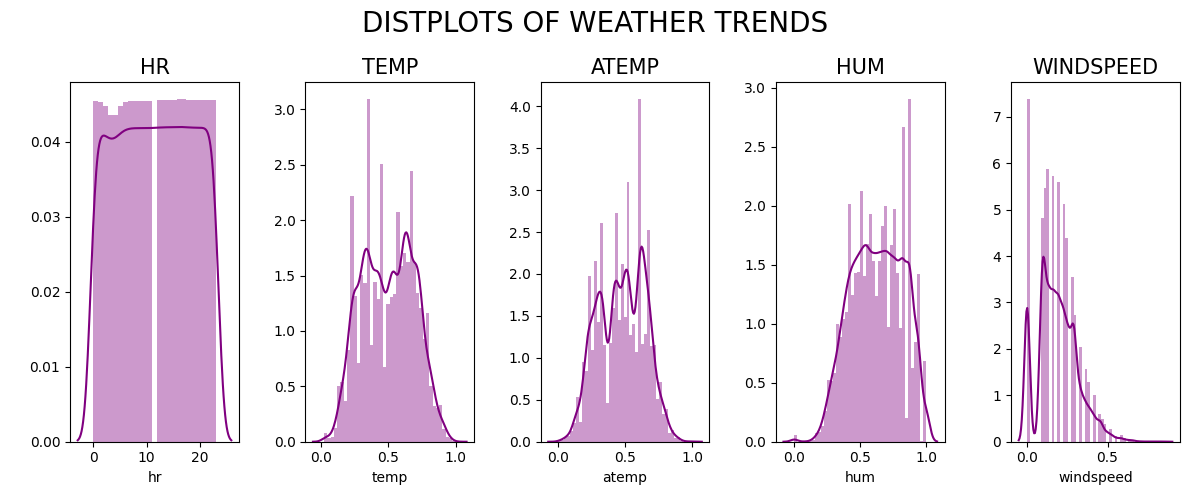

In [39]:
#### Create the plot grid ####

fig, ax = plt.subplots(nrows=1, ncols=len(cont_var), figsize=(12,5))

#title
fig.suptitle('Distplots of weather trends'.upper(),fontsize=20)

#looping
for i in range(len(cont_var)):
    
    sns.distplot(df[cont_var[i]], ax=ax[i], color='purple')
    ax[i].set_title(f'{cont_var[i].upper()}', fontsize=15)
    ax[i].set_ylabel(' ')
    
plt.tight_layout()
plt.show()

#### Observation:
    
   * Temperature & Atemp are centered around mid‑range values, suggesting moderate weather is most common.
   * Humidity is generally high, with a strong tendency toward moist conditions.
   * Windspeed is mostly low, with rare but noticeable gusty events.

### Categorical Variables

In [40]:
cat_var = [i for i in df.select_dtypes(include='object').columns]
cat_var.extend([i for i in df.columns if df[i].nunique()==2])
cat_var

['season', 'mnth', 'weekday', 'weathersit', 'yr', 'holiday', 'workingday']

In [41]:
season_order = ['spring', 'summer', 'fall', 'winter']
mnth_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
weekday_order = ['Sun','Mon','Tues','Wed','Thurs','Fri','Sat']
weathersit_order = ['Clear to Partly Cloudy', 'Misty and Cloudy', 'Light Rain or Snow', 'Heavy Rain or Snow']


order_map = {
    'mnth': mnth_order,
    'weekday': weekday_order,
    'season': season_order,
    'weathersit': weathersit_order
}


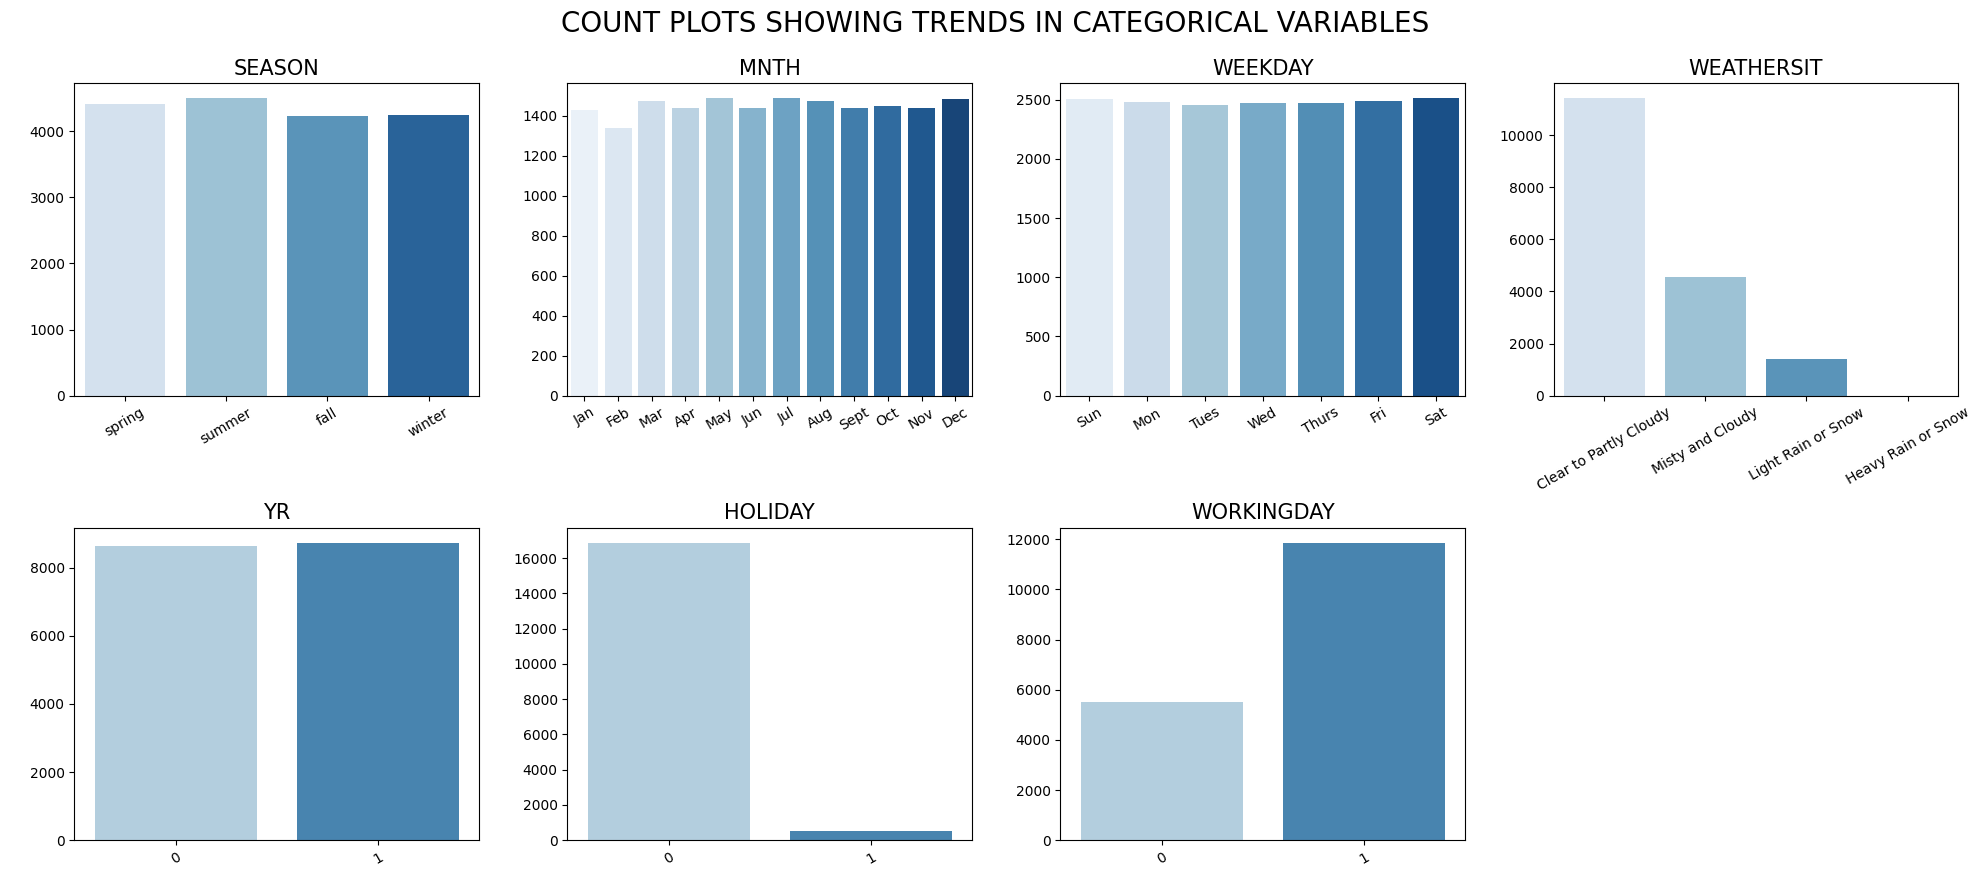

In [42]:
import math

n = len(cat_var)
nrows = 2
ncols = math.ceil(n / nrows)



#### Create the plot grid ####
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 9))

#title
plt.suptitle('Count plots showing trends in categorical variables'.upper(),fontsize=20, fontweight=20, y=0.99)


# Make ax a flat list for simple indexing even if ncols==1
axes = ax.flatten() if hasattr(ax, 'flatten') else [ax]


for k, col in enumerate(cat_var):
    
    order = order_map.get(col, None)       
    
    sns.countplot(
            data=df,
            x=col,
            ax=axes[k],
            palette='Blues',
            order=order
        )
    axes[k].set_title(col.upper(), fontsize=15)
    axes[k].set_xlabel(' ')
    axes[k].set_ylabel(' ')

    # Optional: rotate x labels if categories are long
    axes[k].tick_params(axis='x', rotation=30)

# Turn off any unused subplots if n is odd
for m in range(k + 1, len(axes)):
    fig.delaxes(axes[m])


plt.tight_layout()
plt.show()

#### Observation:
    
   * Season: Counts are fairly balanced across spring, summer, fall, winter with small differences. No season is severely underrepresented.
   * Month: Each month has uniform counts. No obvious gaps or data entry issues.
   * Weekday:  Almost flat distribution.
   * weathersit: Clear to Partly cloudy dominates by a large margin. Misty and cloudy comes next followed by Light Rain or Snow, Heavy Rain or Snow is rare.
   * Workday: Majority of observations are standard workdays

### Bivariate Analysis

##### Continuous Independent variables

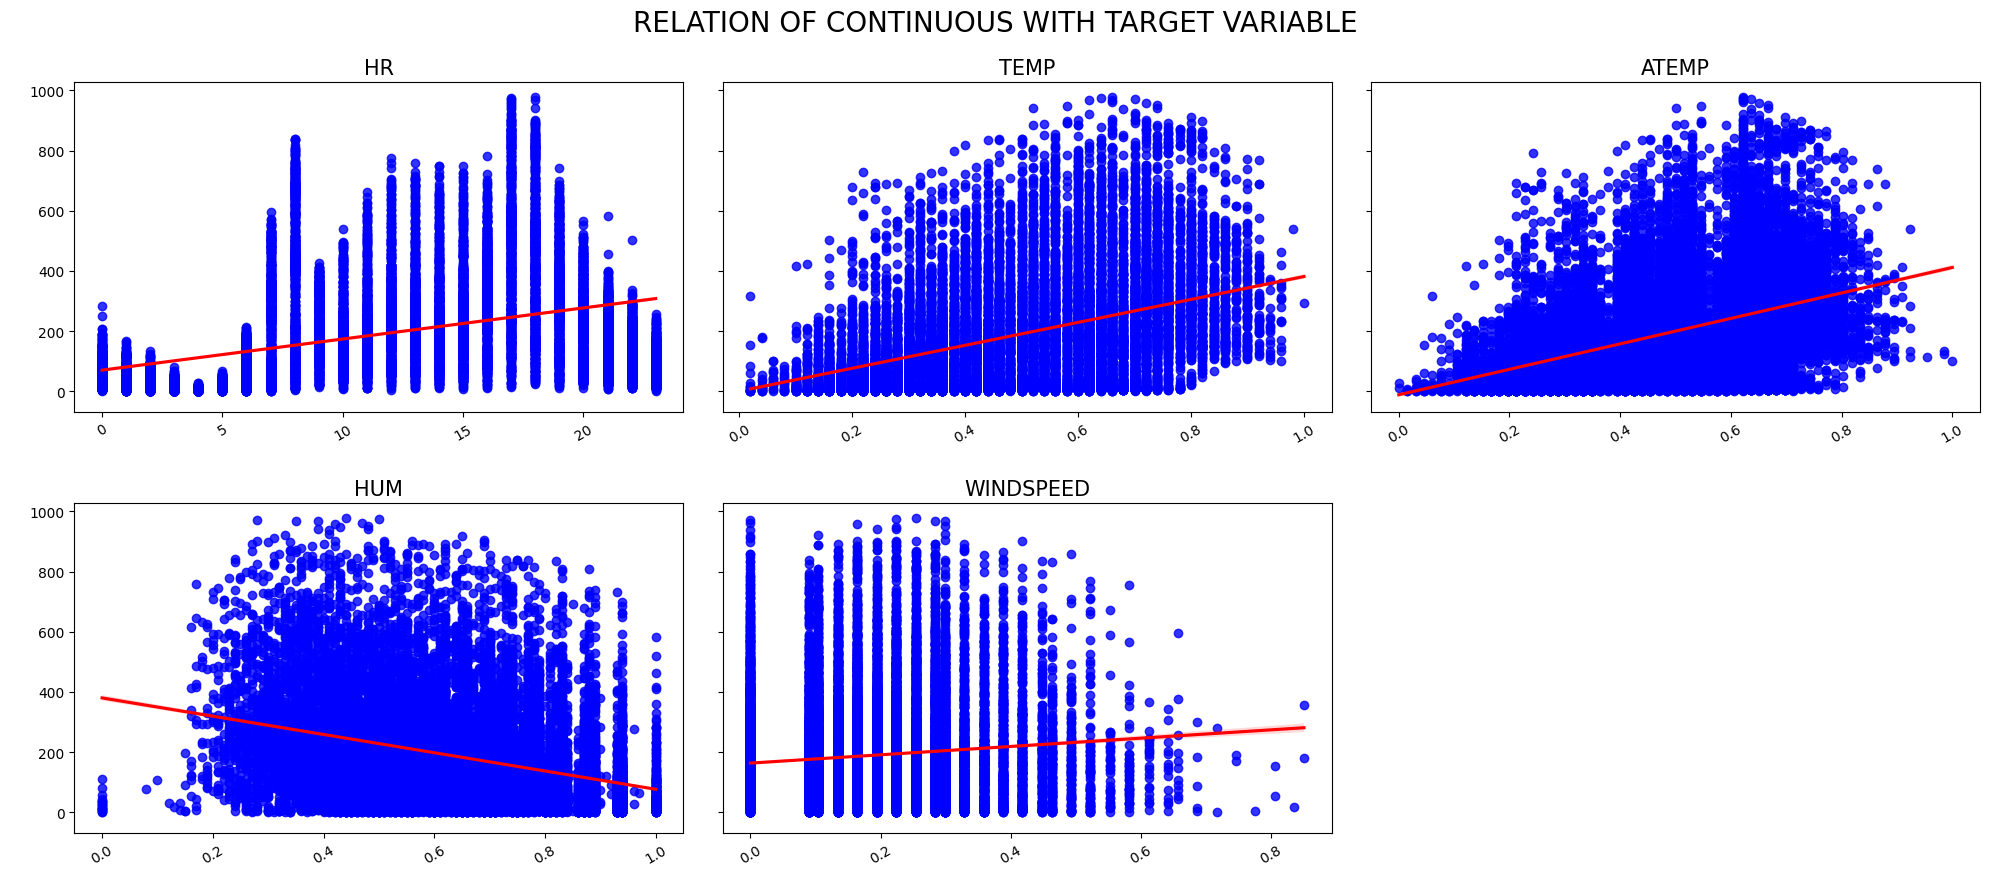

In [43]:
n = len(cont_var)
nrows = 2
ncols = math.ceil(n / nrows)

#### Create the plot grid ####
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 9), sharey=True)

#title
plt.suptitle('relation of continuous with target variable'.upper(),fontsize=20, fontweight=20, y=0.99)

# Make ax a flat list for simple indexing even if ncols==1
axes = ax.flatten() if hasattr(ax, 'flatten') else [ax]

for k, col in enumerate(cont_var):
    sns.regplot(
        data=df,
        x=col,
        y=df['cnt'],
        ax=axes[k],
        scatter_kws={'color':'blue'},
        line_kws={'color':'red'}
            )
    axes[k].set_title(col.upper(), fontsize=15)
    axes[k].set_xlabel(' ')
    axes[k].set_ylabel(' ')

    # Optional: rotate x labels if categories are long
    axes[k].tick_params(axis='x', rotation=30)

# Turn off any unused subplots if n is odd
for m in range(k + 1, len(axes)):
    fig.delaxes(axes[m])


plt.tight_layout()
plt.show()
    

#### Observation:
    
   * HR: very low counts in the late night/early morning, a morning rise, and the highest counts around late afternoon/early evening (commute hours)
   * TEMP : Clear positive association: as temperature moves from cold to comfortable, counts increase.
   * ATEMP: best ridership at comfortable feels‑like; fewer rides when it feels too cold or too hot.
   * HUM: Negative relationship higher humidity correlates with fewer rides.
   * WINDSPEED: Overall relationship looks weak, also stating fewer counts at higher winds.

##### Seasonal Variation

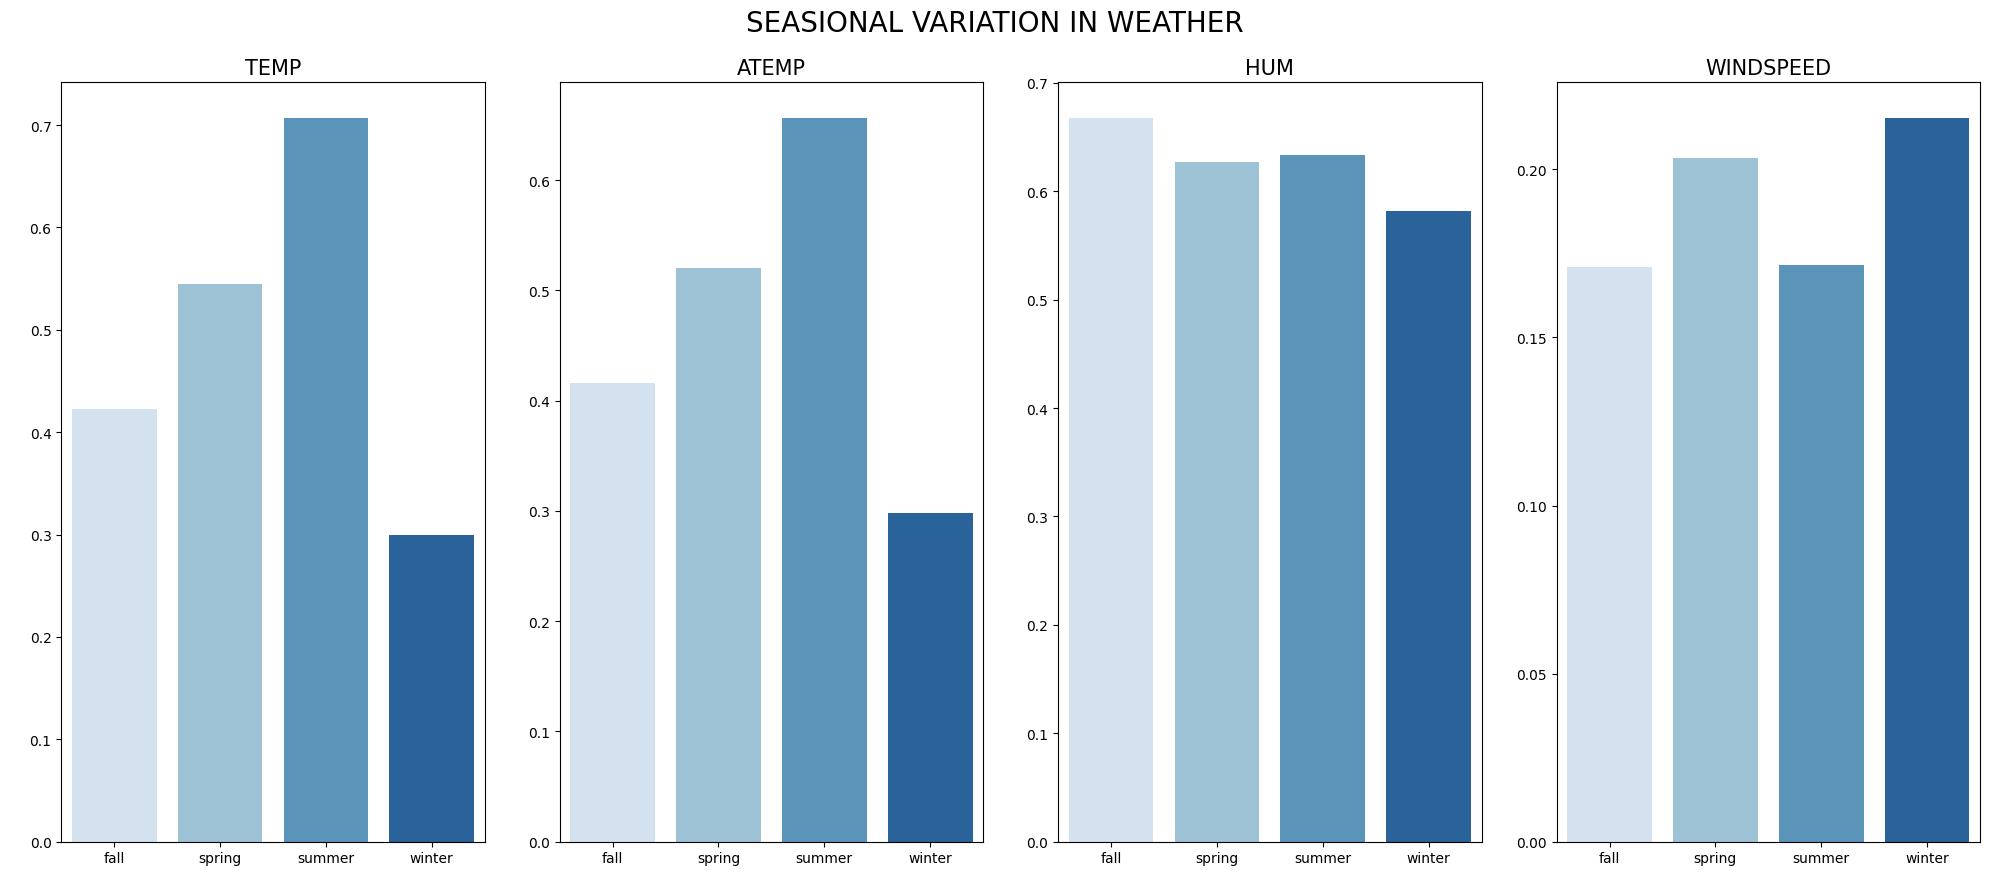

In [44]:
weather_var = ['temp', 'atemp', 'hum', 'windspeed']

#### Create the plot grid ####
fig, ax = plt.subplots(nrows=1, ncols=len(weather_var), figsize=(20, 9))

#title
plt.suptitle('Seasional variation in weather'.upper(),fontsize=20, fontweight=20, y=0.99)

for i in range(len(weather_var)):
    sns.barplot(y=df.groupby('season')[weather_var[i]].mean(),
                x = df.groupby('season')[weather_var[i]].mean().index, ax=ax[i], palette='Blues')
    
    ax[i].set_title(f'{weather_var[i].upper()}', fontsize=15)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
    
plt.tight_layout()
plt.show()
    
    

#### Observation:
    
   * TEMP  - Summer is the warmest, Spring is moderate, Fall is cooler, Winter is the coldest.
   * ATEMP - Summeris a bit lower than TEMP → riders may perceive it a bit less comfortable (likely humidity/wind effects baked into ATEMP). Overall, ATEMP closely tracks TEMP with small, season‑specific deviations (±0.05), which is what we’d expect.
   * HUM   - Consistently high across seasons, with a small range. Compared to temperature, seasonal swings in humidity are modest.
   * WINDSPEED - Winter has the highest winds, Spring next and Summer/Fall are calmer.



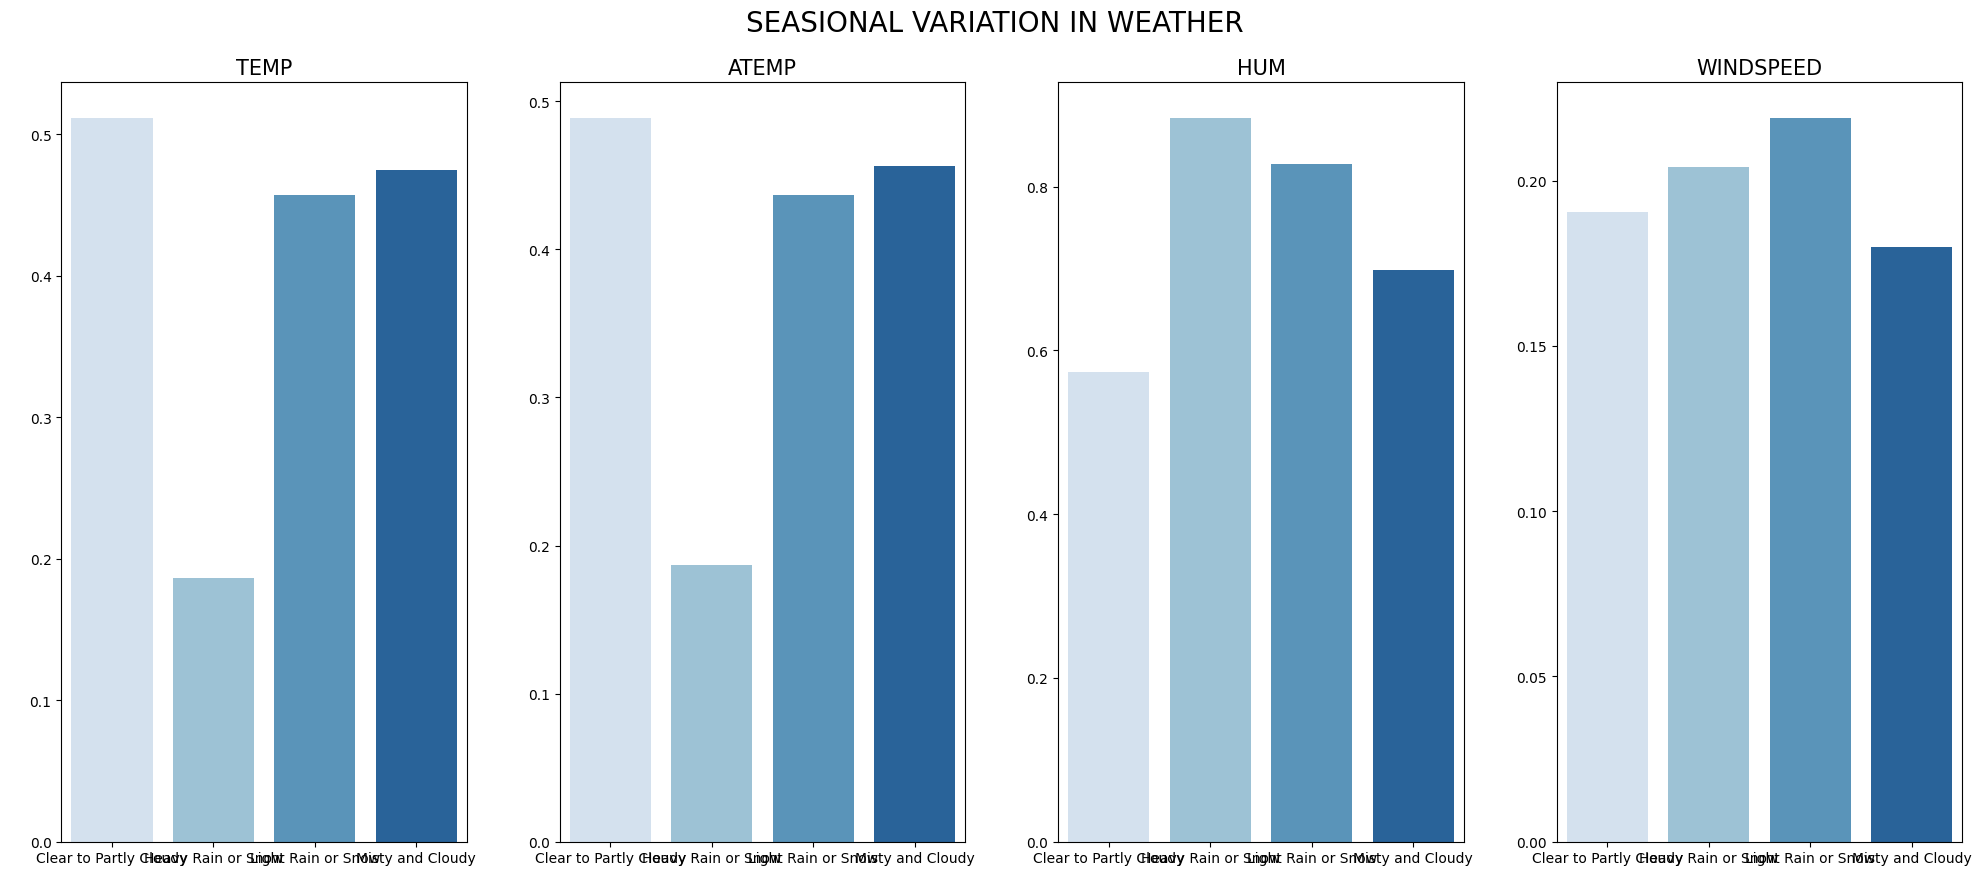

In [45]:
weather_var = ['temp', 'atemp', 'hum', 'windspeed']

#### Create the plot grid ####
fig, ax = plt.subplots(nrows=1, ncols=len(weather_var), figsize=(20, 9))

#title
plt.suptitle('Seasional variation in weather'.upper(),fontsize=20, fontweight=20, y=0.99)

for i in range(len(weather_var)):
    sns.barplot(y=df.groupby('weathersit')[weather_var[i]].mean(),
                x = df.groupby('weathersit')[weather_var[i]].mean().index, ax=ax[i], palette='Blues')
    
    ax[i].set_title(f'{weather_var[i].upper()}', fontsize=15)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
    
plt.tight_layout()
plt.show()

#### Correlation using Heatmap

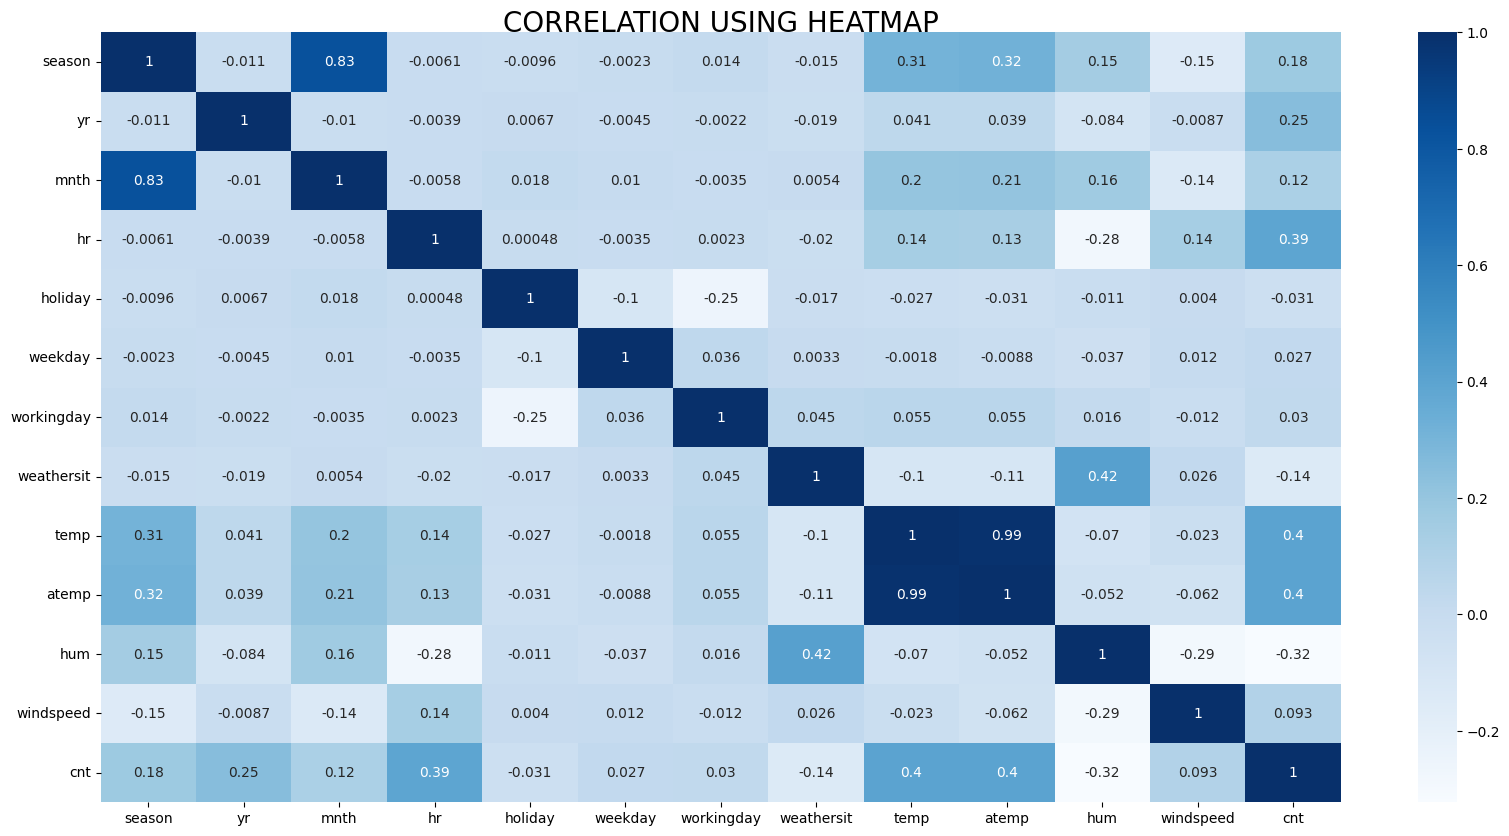

In [47]:
#df_corr = df #pd.concat([X,y],axis=1)
df_corr=pd.read_csv(r"C:\Users\srava\sriharsha_code\End to End Project\bike_sharing_project\notebook\data\bike_sharing_data.csv")
df_corr.drop('dteday', axis=1, inplace=True)

plt.figure(figsize=(20,10))

plt.title('Correlation Using Heatmap'.upper(),fontsize=20, fontweight=20, y=0.99)

sns.heatmap(df_corr.corr(),annot=True, cmap='Blues')

plt.show()

#### Observation:
    
   * High correlation between temp and atemp


#### Growth Over Last Year

In [48]:
growth_df = pd.DataFrame(df.pivot_table(index='mnth', columns='yr', values='cnt', aggfunc='mean'))
growth_df.columns = ['2011', '2012']
growth_df['percent_growth'] = round(((growth_df['2012']-growth_df['2011'])/growth_df['2011'])*100,2)
growth_df = growth_df.sort_values(by = 'percent_growth' )
growth_df

,2011,2012,percent_growth
mnth,,,
Jun,199.322222,281.708333,41.33
Dec,117.844804,166.729111,41.48
Jul,189.974462,273.665323,44.05
May,182.555108,263.259409,44.21
Nov,142.095967,212.623955,49.63
Aug,186.991792,288.310484,54.18
Oct,166.232840,280.848870,68.95
Sept,177.709902,303.573611,70.83
Apr,131.947149,242.651811,83.90


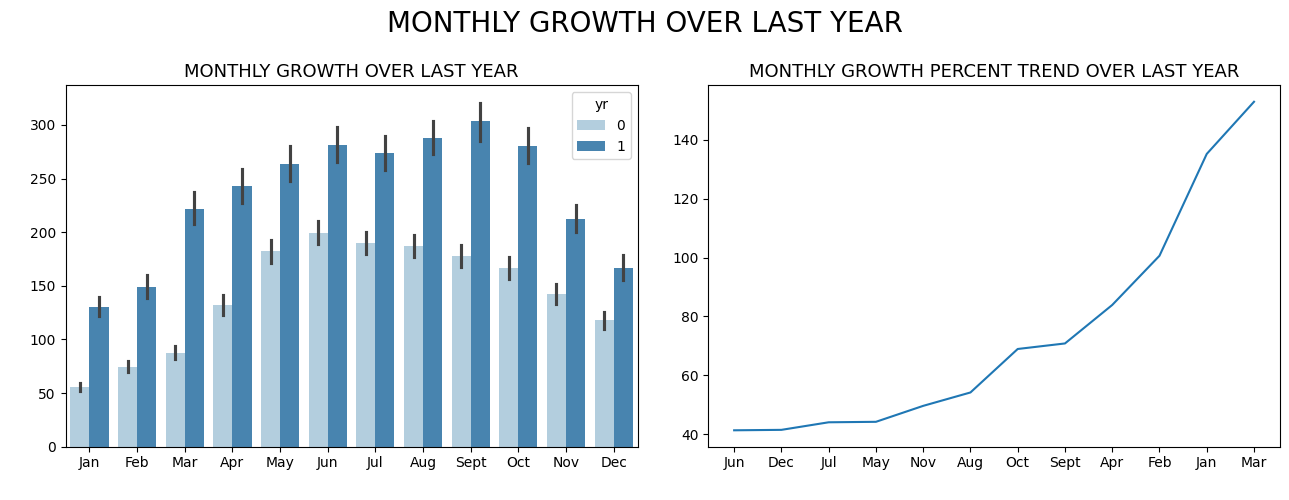

In [49]:
#### Create the plot grid ####
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

#title
plt.suptitle('Monthly growth over last year'.upper(),fontsize=20, fontweight=20, y=0.99)

#plot1
sns.barplot(data=df, x='mnth', y='cnt', hue='yr', ax=ax[0], palette='Blues')
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')
ax[0].set_title('Monthly growth over last year'.upper(),fontsize=13)


#plot2
sns.lineplot(x=growth_df.index, y=growth_df['percent_growth'], ax=ax[1], palette='Blues')
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')
ax[1].set_title('Monthly growth percent trend over last year'.upper(),fontsize=13)

plt.tight_layout()
plt.show()

#### Observation:
    
   * 100% Growth rate observed in the month of JAN, FEB, MAR
   * Overall growth in 2012 over 2011


In [50]:
df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,winter,0,Jan,0,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.81,0.0000,16
1,winter,0,Jan,1,0,Sat,0,Clear to Partly Cloudy,0.22,0.2727,0.80,0.0000,40
2,winter,0,Jan,2,0,Sat,0,Clear to Partly Cloudy,0.22,0.2727,0.80,0.0000,32
3,winter,0,Jan,3,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.75,0.0000,13
4,winter,0,Jan,4,0,Sat,0,Clear to Partly Cloudy,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,winter,1,Dec,19,0,Mon,1,Misty and Cloudy,0.26,0.2576,0.60,0.1642,119
17375,winter,1,Dec,20,0,Mon,1,Misty and Cloudy,0.26,0.2576,0.60,0.1642,89
17376,winter,1,Dec,21,0,Mon,1,Clear to Partly Cloudy,0.26,0.2576,0.60,0.1642,90
17377,winter,1,Dec,22,0,Mon,1,Clear to Partly Cloudy,0.26,0.2727,0.56,0.1343,61
